In [29]:
#library(repr)
#library(pracma)

In [1]:
# Create a simple signal with two frequencies

dt <- 0.001
t <- seq(from=0,to=1,by=dt)
f <- sin(2*pi*50*t) + sin(2*pi*120*t) # Sum of 2 frequencies
f_clean <- f
f <- f + 2.5*rnorm(length(t)) # Add some noise

In [2]:
## Compute the Fast Fourier Transform (FFT)

n <- length(t)
s <- 1:n

fhat <- fft(f)                              # Compute the FFT
PSD <- Re(fhat * Conj(fhat) / n)            # Power spectrum (power per freq)
freq <- (1/(dt*n)) * s                      # Create x-axis of frequencies in Hz
L <- as.integer(1:floor(n/2))               # Only plot the first half of freqs

In [3]:
## Use the PSD to filter out noise
indices <- PSD > 100       # Find all freqs with large power
PSDclean <- PSD * indices  # Zero out all others
fhat <- indices * fhat     # Zero out small Fourier coeffs. in Y

#fft function returns after inversion not normalized values.
#that's why we have to normalize it
ffilt <- Re(fft(fhat, inverse=TRUE))/length(fhat)

# you can also use ifft from "pracma" library
#ffilt <- Re(ifft(fhat))


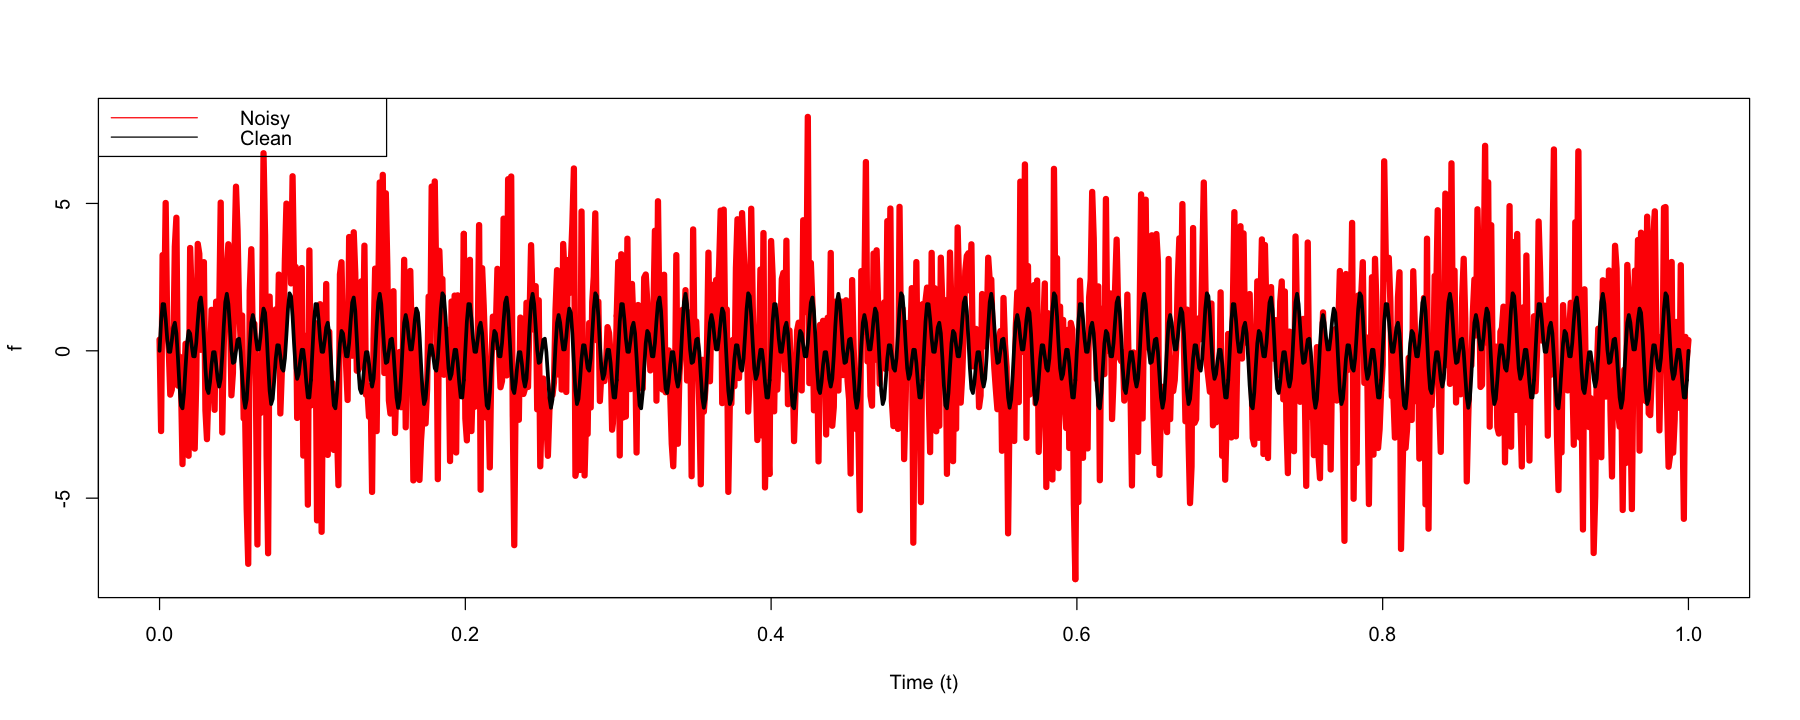

In [4]:
par(mfrow=c(1,1))
options(repr.plot.width=15, repr.plot.height=6)

plot(t, f, type="l", lwd="5", xlab="Time (t)", col="red")
lines(t, f_clean, col="black", lwd=3)
legend("topleft", legend=c("Noisy", "Clean"), 
       col=c("red", "black"), lwd=1, lty=c(1,1), 
       pch=c(NA,NA))

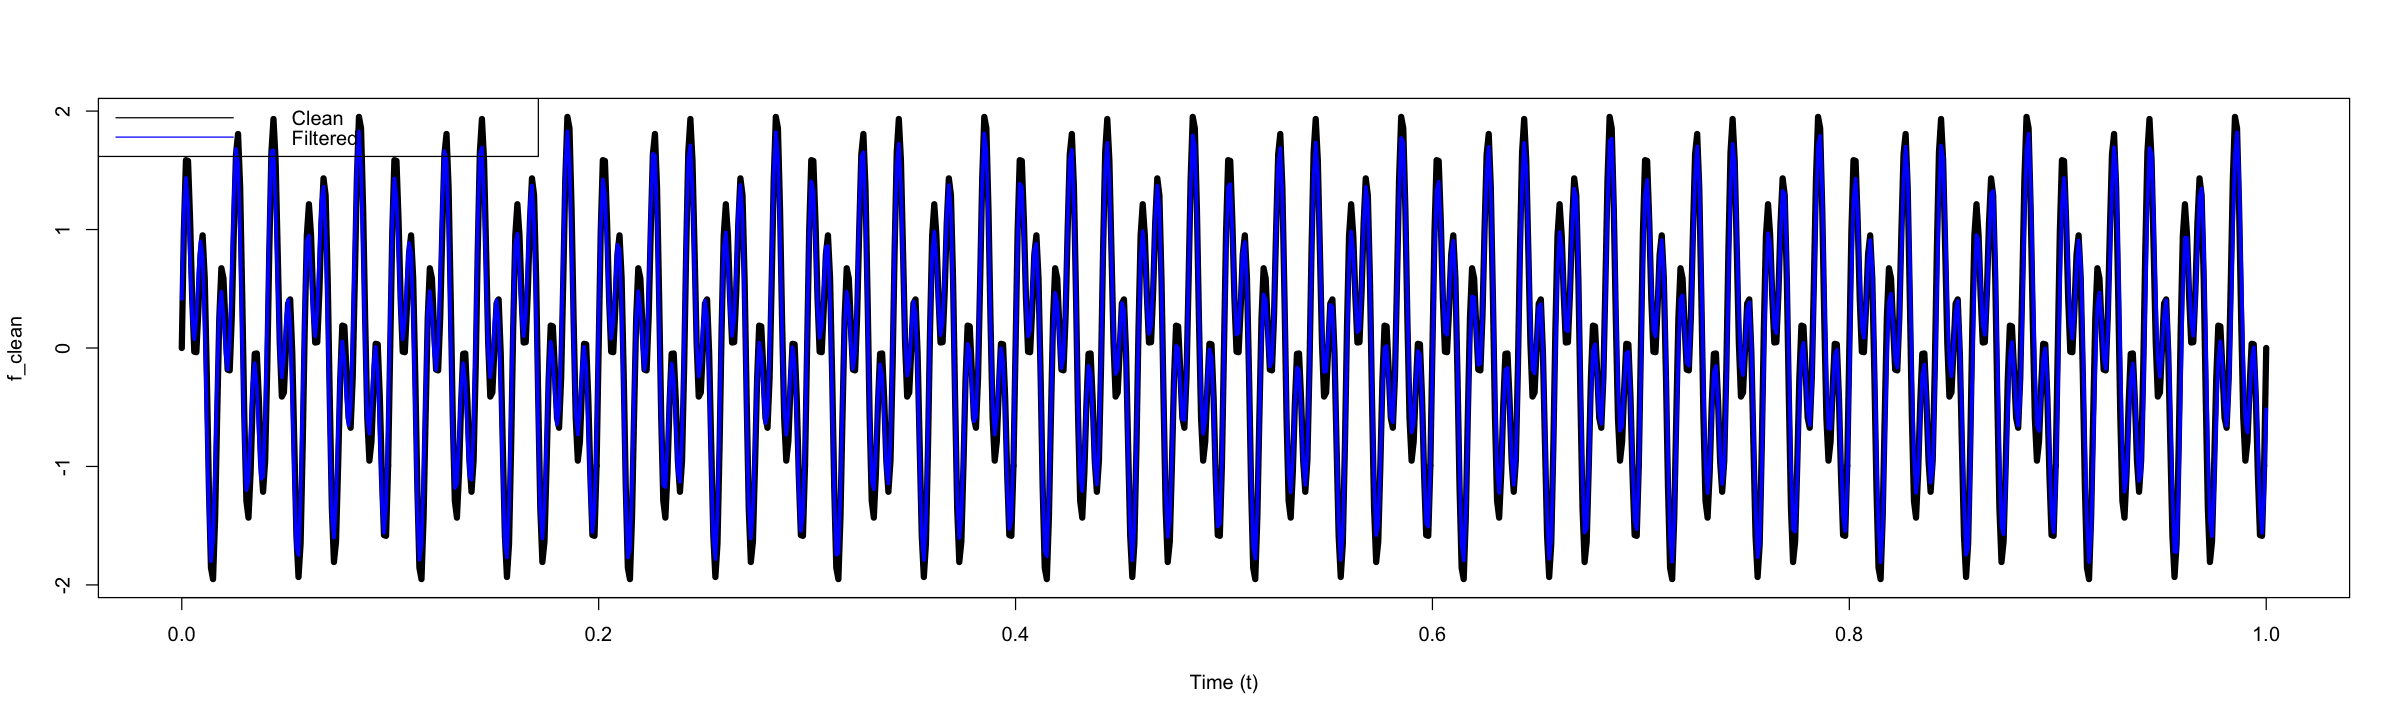

In [5]:
options(repr.plot.width=20, repr.plot.height=6)       

plot(t, f_clean, type="l", lwd="5", xlab="Time (t)", col="black")
lines(t, ffilt, col="blue", lwd=3)
legend("topleft", legend=c("Clean", "Filtered"), 
       col=c("black", "blue"), lwd=1, lty=c(1,1), 
       pch=c(NA,NA))

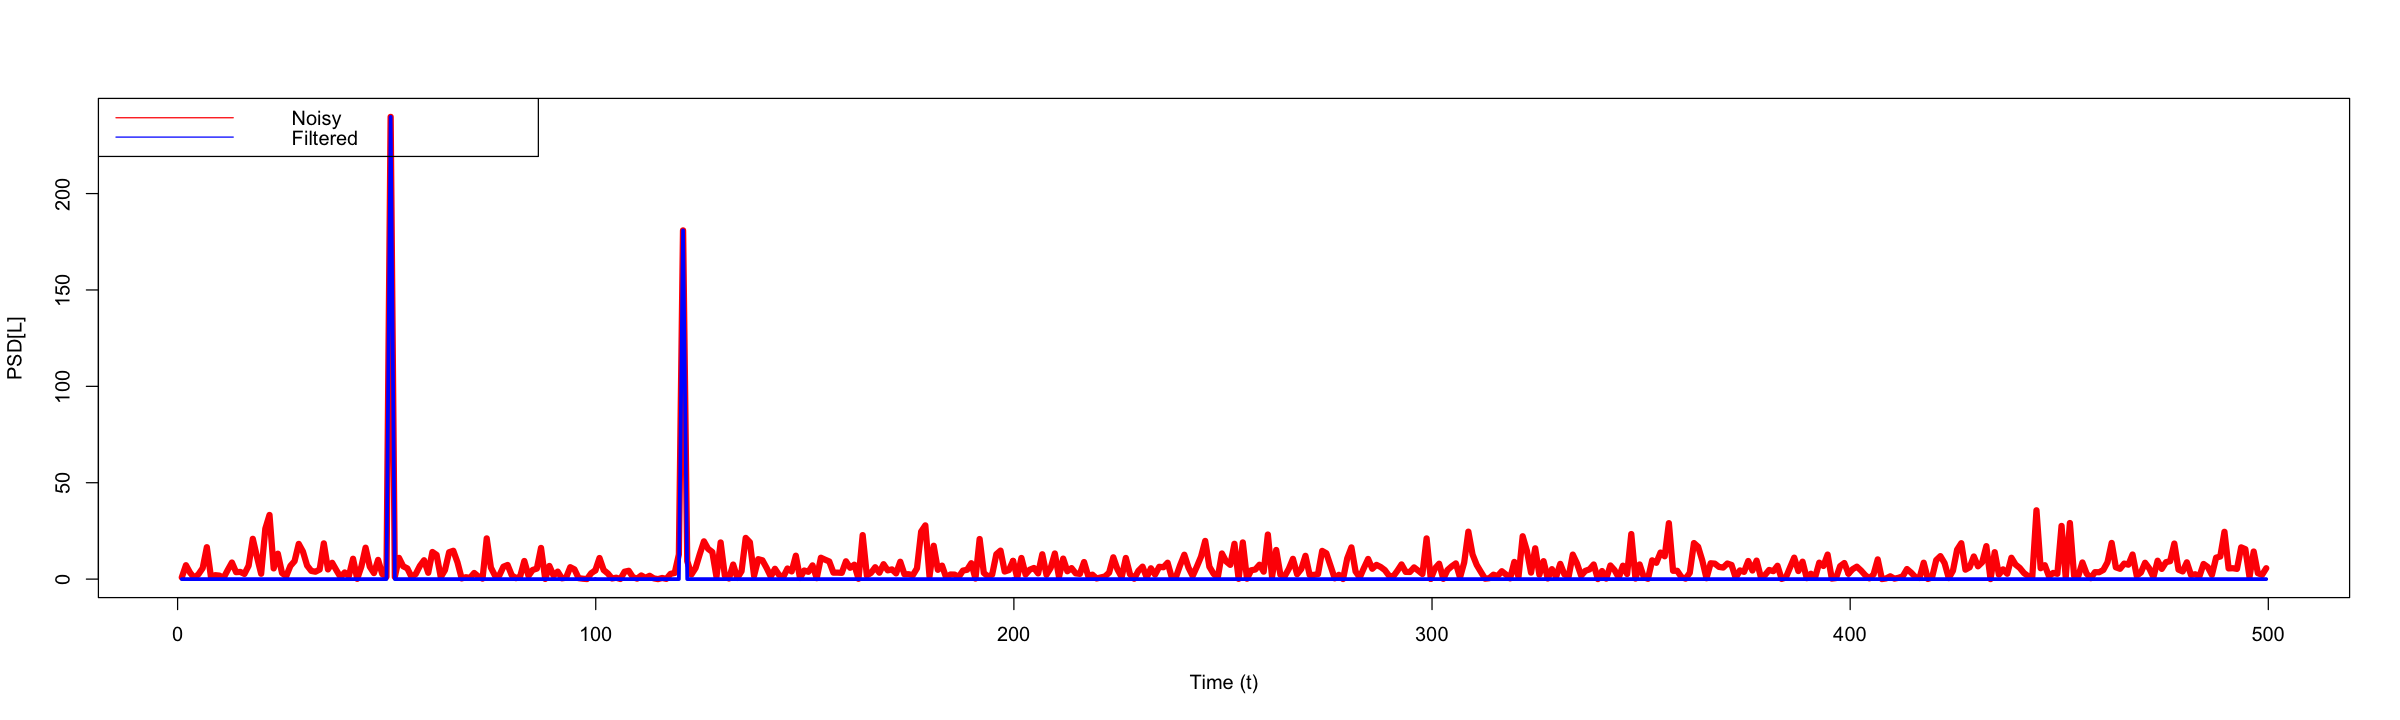

In [6]:
options(repr.plot.width=20, repr.plot.height=6)       

plot(freq[L],PSD[L], type="l", lwd="5", xlab="Time (t)", col="red")
lines(freq[L],PSDclean[L], col="blue", lwd=3)
legend("topleft", legend=c("Noisy", "Filtered"), 
       col=c("red", "blue"), lwd=1, lty=c(1,1), 
       pch=c(NA,NA))